#### While working with this page, you'll be able to find some advice on how you should treat it depending on some information provided by you. These advice are completely optional, I don't insist on you changing your life the way shown below. You ahould love yourself the way you look and feel

### Let me give you the right mood:

In [1]:
# Run this cell in case you don't have the package installed #
%pip install pygame

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pygame
pygame.mixer.init()

from pygame import mixer
mixer.music.load("Music.mp3")
mixer.music.play(-1)

pygame 2.0.1 (SDL 2.0.14, Python 3.8.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


##### In case you get tired of the music, run the following cell

In [3]:
mixer.music.stop()

In [1]:
import pandas as pd

In [2]:
weight = int(input('Enter your weight (in kg): ')) 

Enter your weight (in kg): 68


In [3]:
height = int(input('Enter your height (in cm): ')) 

Enter your height (in cm): 181


## Part 1: Predictions

In [7]:
# Run this cell in case you don't have the package installed #
%pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# This function will be used later
def gender_reveal(prediction):
    if abs(prediction - 0) > abs(prediction - 1):
        return 'male'
    else:
        return 'female'

In [5]:
Data_ML = pd.read_csv('weight-height.csv')
# The data was retrieved from: https://www.kaggle.com/majidarif17/weight-and-heightcsv

##### Take a quick look on the data:

In [6]:
Data_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [7]:
Data_ML.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


#### Now, let's change the data for genders into a numerical type:

In [8]:
Data_ML['Gender'].replace('Female',0, inplace=True)
Data_ML['Gender'].replace('Male',1, inplace=True)

#### Creating the key part:

In [9]:
Params = Data_ML[['Height', 'Weight']].values
Genders = Data_ML['Gender'].values

In [10]:
Params_train, Params_test, Genders_train, Genders_test = train_test_split(Params, Genders)

In [11]:
lin_reg = LinearRegression().fit(Params_train, Genders_train)

In [12]:
lin_pred = lin_reg.predict(Params_test)

In [13]:
my_gender = lin_reg.predict([[height * 0.393701, weight * 2.20462]])

### Let's see how it works:

In [14]:
print('According to my prediction, you are a', gender_reveal(my_gender))

According to my prediction, you are a female


In [15]:
check_p = input('Please, tell me, if the prediction is correct (Yes/No):')

Please, tell me, if the prediction is correct (Yes/No):No


In [16]:
if check_p == 'Yes':
    print('Fantastic!')
else:
    print('Probably, there was not enough information to predict your gender precisely enough.')
    print('You seem to be different from thousands of people, which is amazing :)')
    if gender_reveal(my_gender) == 'female':
        my_gender = 1
    else:
        my_gender = 0

Probably, there was not enough information to predict your gender precisely enough.
You seem to be different from thousands of people, which is amazing :)


## Part 2: Websites

### This part contains working with selenium, which requires using a browser you work with. I have been working with Safari, but in case you have another one, change it in the code, or specify the path. You may also be asked to allow remote automation for the code to run. I have written similar messages when the package is used, but it's better to be aware of these caveats in advance.

In [17]:
Gender = gender_reveal(my_gender)
age = int(input('Enter your age:'))

Enter your age:19


In [18]:
import requests
from bs4 import BeautifulSoup

In [19]:
Info = [height, weight, age, Gender]
Outcomes = ['Underweight', 'Healthy weight', 'Overweight', 'Obese']
BMI = round(weight / ((height / 100) ** 2), 1)
if Info[3] == 'female':
    url = 'https://www.calculator.net/calorie-calculator.html?csex=f'
else:
    url = 'https://www.calculator.net/calorie-calculator.html?csex=m'
if BMI < 18.5:
    State = 'Underweight'
elif BMI >= 18.5 and BMI <= 24.9:
    State = 'Healthy weight'
elif BMI >= 25 and BMI <= 29.9:
    State = 'Overweight'
else:
    State = 'Obese'
No = Outcomes.index(State)

In [24]:
# Run this cell in case you don't have the packages installed #
%pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [20]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from PIL import Image  
import time

In [21]:
# If you are using a browser other than Safari, change it in the next cell

In [22]:
driver = webdriver.Safari()
driver.get('http://bmijs.is.tuebingen.mpg.de/body_masses/generate_bmi?utf8=✓&locale=en&body_mass%5Bunit_measurment%5D=M&body_mass%5Bgender%5D=' + Gender.capitalize() + '&body_mass%5Bage%5D=' + str(age) + '&body_mass%5Bheight%5D=' + str(height/100) + '&body_mass%5Bfeet%5D=&body_mass%5Binches%5D=&body_mass%5Bweight%5D=' + str(weight) + '&commit=Calculate+BMI')
time.sleep(5) # The page has some animation to load
driver.save_screenshot('body.png')
driver.quit()

In [23]:
print('Your BMI is', BMI)

Your BMI is 20.8


This is how your body is predicted to look like:


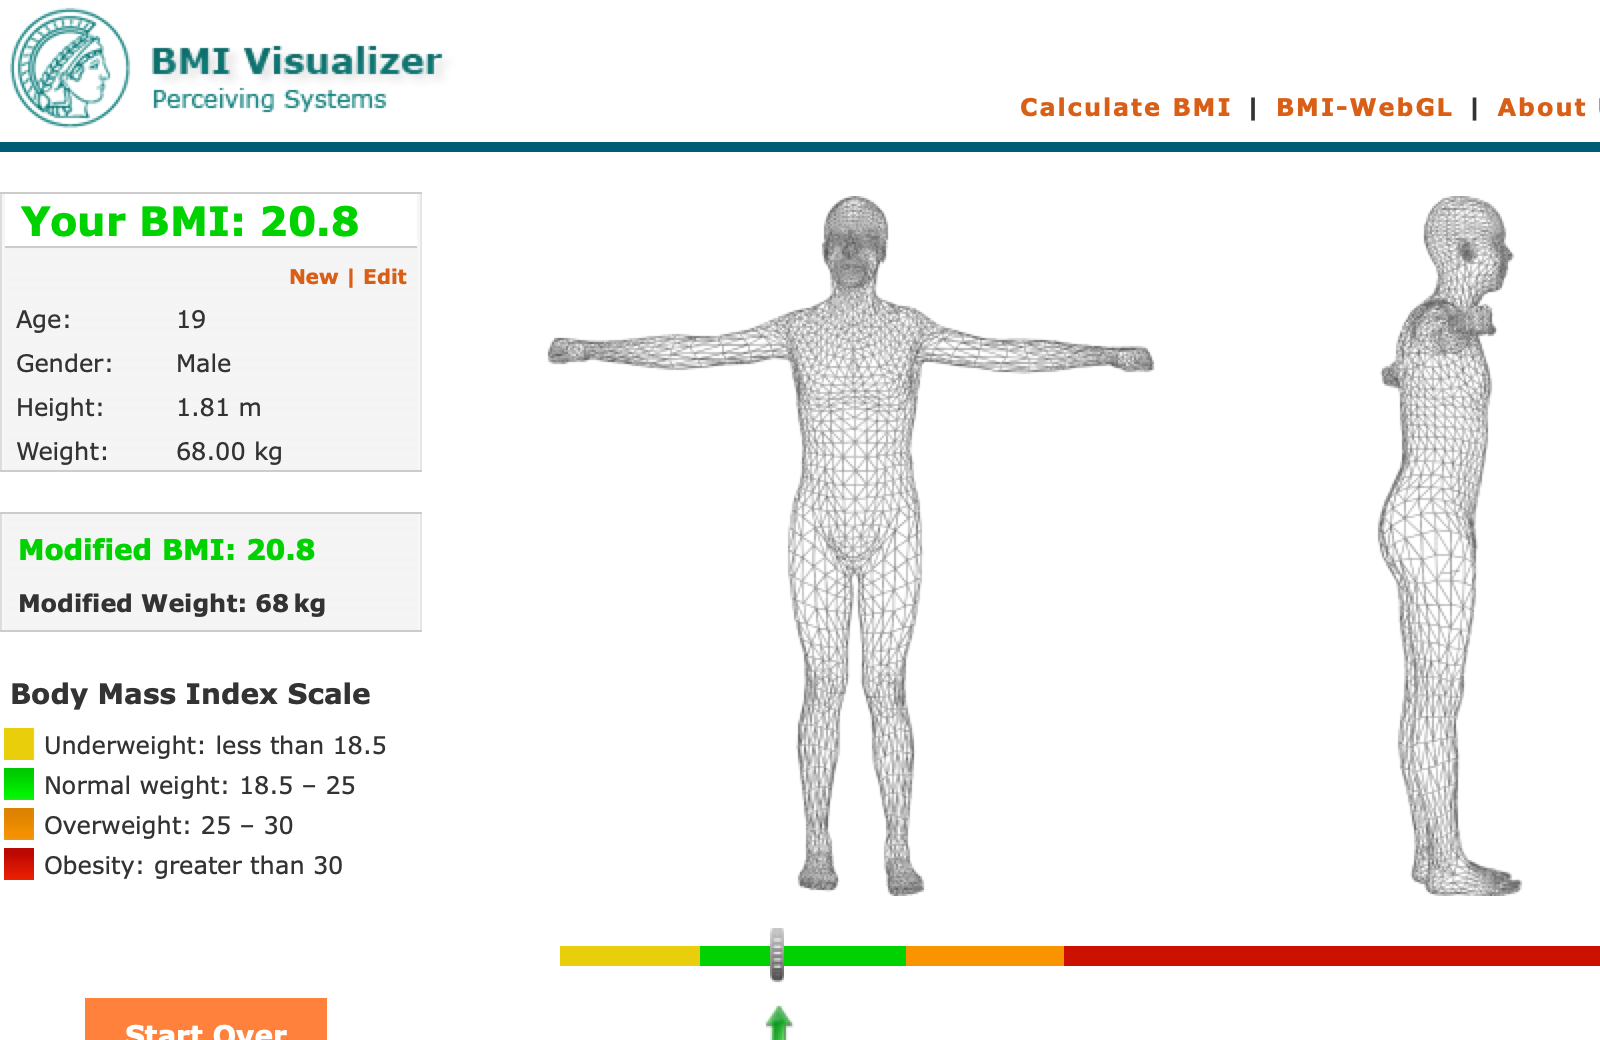

In [254]:
print('This is how your body is predicted to look like:')
Image.open('body.png')

In [25]:
if No == 0:
    print('You are', str.lower(State) + ". Let's work on gaining weight plans.")
elif No == 1:
    print('You are a', str.lower(State) + ". Let's work on maintaining weight plans.")
else:
    print('You are', str.lower(State) + ". Let's work on losing weight plans.")

You are a healthy weight. Let's work on maintaining weight plans.


### Let's consider the problem in more detail:

In [26]:
# If you are using a browser other than Safari, change it in the next cell

In [27]:
driver = webdriver.Safari()
driver.get(url)
element = driver.find_element_by_name('cheightmeter')
element.send_keys(str(Info[0]))
element = driver.find_element_by_name('cage')
element.send_keys(str(Info[2]))
element = driver.find_element_by_name('ckg')
element.send_keys(str(Info[1]) + Keys.RETURN)
try:
    elem = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CLASS_NAME, "result_box")))
finally:
    content = driver.page_source
    driver.quit()
    
    
# I hope that you will be able to tune the browser so that the code runs correctly, 
# but in case it does not, uncomment run the following cell, and ignore the one after:

In [33]:
# Calories = 2000

In [28]:
all_plans = BeautifulSoup(content).find_all('b')[0:7]
if No == 0:
    Calories = all_plans[5].text
elif No == 1:
    Calories = all_plans[0].text
elif No == 2:
    Calories = all_plans[1].text
else:
    Calories = all_plans[2].text

In [29]:
print('To achieve the set goal, you should consume', Calories, 'calories daily')

To achieve the set goal, you should consume 2,522 calories daily


## Part 3: Tables

In [30]:
Meals = pd.read_csv('Recipes.csv')
# Data retrieved from https://www.kaggle.com/hugodarwood/epirecipes

In [31]:
Meals.sample(2)

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
17869,"Rice Salad with Arugula, Pine Nuts and Olives",4.375,345.0,7.0,18.0,550.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10877,Oxtail Soup with Red Wine and Root Vegetables,4.375,691.0,40.0,43.0,1102.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Let's get rid of the most columns that we won't need:

In [32]:
Meals = Meals[['title', 'rating', 'calories', 'breakfast', 'lunch', 'dinner', 'snack', 'fat', 'protein']]

In [33]:
Meals.sample(3)

,title,rating,calories,breakfast,lunch,dinner,snack,fat,protein
18100,Roasted-Tomato Sauce,4.375,146.0,0.0,0.0,0.0,0.0,12.0,2.0
9915,Banana Bread,0.000,274.0,1.0,0.0,0.0,1.0,10.0,4.0
15600,Rugelach Three Ways,0.000,91.0,0.0,0.0,0.0,0.0,5.0,1.0


In [34]:
Recipes = pd.read_json('Recipes.json')
# Data retrieved from https://www.kaggle.com/hugodarwood/epirecipes

In [35]:
Recipes.sample(1)

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
14841,"[Put the chia seeds, blood orange juice and ag...",5.0,2013-07-08 04:00:00+00:00,"[Breakfast, Yogurt, High Fiber, Orange, Health...",198.0,"Rich in protein, essential fatty acids and fib...",5.0,4.375,Chia Seed Porridge with Orange & Yogurt,"[4 tsp chia seeds, 1/2 cup (4 fl oz/125ml) blo...",28.0


#### Let's get rid of the most columns that we won't need:

In [36]:
Recipes = Recipes[['title', 'directions', 'ingredients']]

In [37]:
Recipes.sample(2)

,title,directions,ingredients
14112,Quark (Sour Fresh Cheese),[Preheat the oven to 150°F/65°C. Pour the butt...,[8 1/2 cups/2L buttermilk]
7571,"Red, White, and Blue Cheesecake with Chocolate...",[In a bowl stir together the cookie crumbs and...,"[28 chocolate wafers, ground fine in a blender..."


In [38]:
Meals = Meals.set_index('title').join(Recipes.set_index('title'))
Breakfasts = Meals[Meals['breakfast'] == 1.0][['rating', 'calories', 'fat', 'protein', 'directions', 'ingredients']].dropna().query('calories < 1500')
Lunches = Meals[Meals['lunch'] == 1.0][['rating', 'calories', 'fat', 'protein', 'directions', 'ingredients']].dropna().query('calories < 1500')
Dinners = Meals[Meals['dinner'] == 1.0][['rating', 'calories', 'fat', 'protein', 'directions', 'ingredients']].dropna().query('calories < 1500')
Snacks = Meals[Meals['snack'] == 1.0][['rating', 'calories', 'fat', 'protein', 'directions', 'ingredients']].dropna().query('calories < 1500')

#### Now, let's select only the best, verified recipes:

In [39]:
Lunches = Lunches.reset_index()
Breakfasts = Breakfasts.reset_index()
Dinners = Dinners.reset_index()
Snacks = Snacks.reset_index()

In [40]:
Lunches = Lunches.where(Lunches['rating'] >= 3.0).dropna()
Breakfasts = Breakfasts.where(Breakfasts['rating'] >= 3.0).dropna()
Dinners = Dinners.where(Dinners['rating'] >= 3.0).dropna()
Snacks = Snacks.where(Snacks['rating'] >= 3.0).dropna()

In [41]:
Dinners.sample(2)

,title,rating,calories,fat,protein,directions,ingredients
181,Braised Beef Brisket,4.375,858.0,62.0,46.0,[Preheat oven to 350°F with rack in lower thir...,"[3 tablespoons canola oil, 1 (2-pounds) piece ..."
1265,Quick Paella,3.750,943.0,37.0,43.0,"[1 In a large skillet with a lid, brown the sa...","[3/4 pound cooked chorizo or linguiça sausage,..."


#### Now, let's make a random meal plan for you:

In [42]:
meals = [Breakfasts.sample(1), Lunches.sample(1), Dinners.sample(1), Snacks.sample(1)]

In [43]:
Plan = pd.concat(meals)
Plan = Plan.reset_index()
factor = (int(Calories.split(',')[0] + Calories.split(',')[1])/Plan.sum()['calories']).round(1)
Plan

,index,title,rating,calories,fat,protein,directions,ingredients
0,26,Bacon and Egg Empañadas,4.375,930.0,31.0,43.0,[Preheat oven to 425°F. and butter a baking pa...,"[2 frozen turnover dough (empanada) wrappers*,..."
1,954,Turkey Wraps with Chipotle Mayonnaise,4.375,716.0,55.0,29.0,"[Combine mayonnaise, cilantro, green onion, ch...","[1/2 cup mayonnaise, 3 tablespoons chopped fre..."
2,1327,Ricotta-Pumpkin Gnocchi With Brown Butter,3.125,792.0,53.0,23.0,"[Using a knife or garlic press, finely chop 2 ...","[6 garlic cloves, divided, 2 large egg yolks, ..."
3,12,Meyer Lemon Bars,3.750,290.0,13.0,4.0,"[Preheat oven to 350°. Grease a 9"" x 13"" bakin...","[2 1/4 cups unbleached all-purpose flour, divi..."


#### You have seen a meal plan that may work for you. If you don't like the meals, you may rerun the cells above and get another list of foods.

##### Creating a file with your meals:

In [44]:
text = "To satisfy your recommended calorie intake amount, multiply the portions by " + str(factor) 
f = open("Meal plan.txt", "a")
f.truncate(0)
f.write(text)
for index, row in Plan.iterrows():
    f.write('\n')
    f.write('\n')
    f.write('\n')
    text = 'Meal ' + str(index + 1) + ':\n'
    f.writelines(text)
    f.write('\nIngredients:\n')
    text = '\n'.join(Plan.iloc[index]['ingredients'])
    f.writelines(text)
    f.write('\n')
    f.write('\n')
    text = '\n'.join(Plan.iloc[index]['directions'])
    f.writelines(text)
    f.write('\n')
    for i in range(3, 6):
        text = '\n' + Plan.columns.values.tolist()[i].capitalize() + ' per portion: ' + str(Plan.iloc[index][i])
        f.writelines(text)
f.close()

### Now you have a meal plan for a day in a file named 'Meal plan.txt'
### It is located in the same directory with this notebook

In [45]:
Breakfasts['directions'] = [' '.join(map(str, l)) for l in Breakfasts['directions']]
Lunches['directions'] = [' '.join(map(str, l)) for l in Lunches['directions']]
Dinners['directions'] = [' '.join(map(str, l)) for l in Dinners['directions']]
Snacks['directions'] = [' '.join(map(str, l)) for l in Snacks['directions']]
Breakfasts['ingredients'] = [' '.join(map(str, l)) for l in Breakfasts['ingredients']]
Lunches['ingredients'] = [' '.join(map(str, l)) for l in Lunches['ingredients']]
Dinners['ingredients'] = [' '.join(map(str, l)) for l in Dinners['ingredients']]
Snacks['ingredients'] = [' '.join(map(str, l)) for l in Snacks['ingredients']]
Breakfasts = Breakfasts.drop_duplicates()
Lunches = Lunches.drop_duplicates()
Dinners = Dinners.drop_duplicates()
Snacks = Snacks.drop_duplicates()

## Part 4: R 
###### This is my least favourite part, no fun at all

In [46]:
Breakfasts = Breakfasts[['title', 'calories', 'rating', 'protein', 'fat']].groupby('rating').mean().reset_index()
Lunches = Lunches[['title', 'calories', 'rating', 'protein', 'fat']].groupby('rating').mean().reset_index()
Dinners = Dinners[['title', 'calories', 'rating', 'protein', 'fat']].groupby('rating').mean().reset_index()

### I have decided to plot some graphs to get an idea of preferences of the people who have rated the recipes provided
### Let's create a couple of files we'll need:

In [47]:
Df = pd.concat([Breakfasts, Lunches, Dinners])

In [48]:
Df.sample(2)

,rating,calories,protein,fat
1,3.75,477.086364,24.472727,27.895455
1,3.75,364.015152,12.340909,19.492424


In [49]:
from pathlib import Path
with open (Path(f"R") / "Data.csv", "w") as f:
        f.write(Df.to_csv())

### Working with R in this notebook was challenging. Eventually, I have decided to create a separate file, which includes working with ggplot2, as well as a patchwork extension (to plot on the same graph easily) and tibble, which is a part of tidyverse. You can find it in the "R" folder

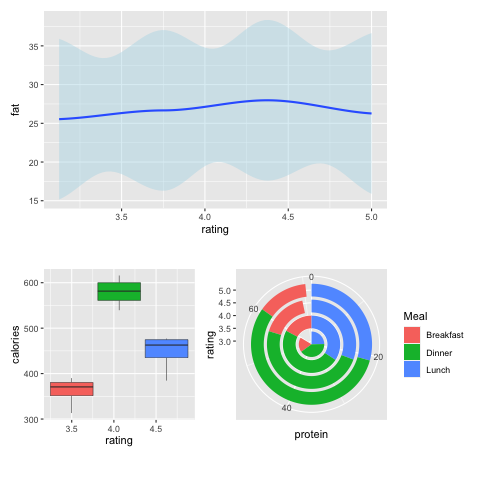

In [50]:
# Here's only the final result:
Image.open('R/myplot.png')

## Part 5: API & Geodata


#### First, let's gather the data about gyms in Moscow:

In [415]:
addresses = []
names = []
url = "https://sportgyms.ru/moscow/page/"
for x in range(1,51):
    web = url + str(x)
    r = requests.get(web)
    s = BeautifulSoup(r.text)
    adrs = s.find_all('div', {'class' : 'ciAdress'})
    nams = s.find_all('div', {'class' : 'clubWrap clubWrapCat'})
    for i in range(len(adrs)):
        addresses.append(adrs[i].text[7:])
        names.append(nams[i].find('h2').text)

In [416]:
Gyms = pd.DataFrame({'Name' : names, 'Address' : addresses})

In [417]:
Gyms

,Name,Address
0,Фитнес-клуб «World Class» (Ярцевская),"ул. Ярцевская, д.19, ТЦ «Кунцево Плаза»"
1,Фитнес-центр «Family Club» (Переделкино),"ул. Шолохова, д.5"
2,Фитнес-клуб «СССР» (Нагатинская),"Хлебозаводский проезд, д.7, стр.10"
3,Фитнес-клуб «World Class» (Строгино),"ул. Кулакова, д.20, к.1"
4,Фитнес-клуб «World Class Lite» (Митино),"Пятницкое шоссе, д.29, к.5"
...,...,...
981,Лечебно-оздоровительный курорт «Devon Medical...,"ул. Таёжная, д.1"
982,Фитнес-клуб «Brooklyn Fitboxing» (Преображенка),"ул. Краснобогатырская, д.89, стр.5"
983,Студия персонального тренинга «Heavy Duty»,"ул. Таганская, д.44"
984,Фитнес-клуб «Brooklyn Fitboxing» (Шаболовская),"Конный переулок, д.12"


In [425]:
API_Key = '01e9a81f6a9382e89cc4360301c8d016'
text = Gyms.iloc[6]['Address'] 
# That's my key for a website https://api.opencagedata.com/geocode
# You can also input your own, if you want

In [426]:
resp = requests.get('http://api.positionstack.com/v1/forward?access_key=' + API_Key + '&query=Москва,' + text)
resp_json_payload = resp.json()

In [427]:
resp_json_payload

{'data': [{'latitude': 55.741469,
   'longitude': 37.615561,
   'type': 'locality',
   'name': 'Moscow',
   'number': None,
   'postal_code': None,
   'street': None,
   'confidence': 1,
   'region': 'Moscow City',
   'region_code': 'MS',
   'county': 'Jakimanka',
   'locality': 'Moscow',
   'administrative_area': None,
   'neighbourhood': None,
   'country': 'Russia',
   'country_code': 'RUS',
   'continent': 'Europe',
   'label': 'Moscow, MS, Russia'},
  {'latitude': 55.778834,
   'longitude': 37.653721,
   'type': 'venue',
   'name': 'Москва-Пассажирская',
   'number': None,
   'postal_code': None,
   'street': None,
   'confidence': 1,
   'region': 'Moscow City',
   'region_code': 'MS',
   'county': 'Jakimanka',
   'locality': 'Moscow',
   'administrative_area': None,
   'neighbourhood': 'Lefortovo',
   'country': 'Russia',
   'country_code': 'RUS',
   'continent': 'Europe',
   'label': 'Москва-Пассажирская, Moscow, MS, Russia'},
  {'latitude': 55.801707,
   'longitude': 37.651515,

In [428]:
Lon = []
Lat = []
for i in range(len(Gyms)):
    text = Gyms.iloc[i]['Address'] 
    resp = requests.get('http://api.positionstack.com/v1/forward?access_key=' + API_Key + '&query=Москва,' + text)
    resp_json_payload = resp.json()
    try:
        lng = resp_json_payload['data'][0]['longitude']
        Lon.append(lng)
        lat = resp_json_payload['data'][0]['latitude']
        Lat.append(lat)
        print(i)
    except:
        Lon.append(None)
        Lat.append(None)

1
2
4
6
7
9
11
12
13
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
39
40
41
42
43
46
47
49
50
52
53
55
57
58
59
60
61
62
63
64
65
66
67
69
72
74
76
77
78
80
82
83
84
86
88
89
90
91
92
93
94
95
96
97
98
99
100
101
103
104
106
107
108
110
111
113
114
115
117
119
120
122
123
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
155
158
159
161
162
164
165
167
168
170
171
173
174
176
177
178
180
181
182
183
184
185
186
187
188
189
190
191
193
194
195
196
197
198
199
200
201
203
204
206
207
211
214
216
217
218
219
220
221
222
223
224
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
248
249
251
252
254
255
257
258
259
260
261
263
264
266
267
269
270
272
273
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
298
299
301
302
304
305
306
308
309
311
312
313
314
318
319
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
343
344

In [431]:
Geos = pd.DataFrame({'lon' : Lon, 'lat' : Lat})

In [432]:
Geos.to_csv('Geos.csv')

In [433]:
Gyms

,Name,Address
0,Фитнес-клуб «World Class» (Ярцевская),"ул. Ярцевская, д.19, ТЦ «Кунцево Плаза»"
1,Фитнес-центр «Family Club» (Переделкино),"ул. Шолохова, д.5"
2,Фитнес-клуб «СССР» (Нагатинская),"Хлебозаводский проезд, д.7, стр.10"
3,Фитнес-клуб «World Class» (Строгино),"ул. Кулакова, д.20, к.1"
4,Фитнес-клуб «World Class Lite» (Митино),"Пятницкое шоссе, д.29, к.5"
...,...,...
981,Лечебно-оздоровительный курорт «Devon Medical...,"ул. Таёжная, д.1"
982,Фитнес-клуб «Brooklyn Fitboxing» (Преображенка),"ул. Краснобогатырская, д.89, стр.5"
983,Студия персонального тренинга «Heavy Duty»,"ул. Таганская, д.44"
984,Фитнес-клуб «Brooklyn Fitboxing» (Шаболовская),"Конный переулок, д.12"


In [434]:
Geos = pd.read_csv('Geos.csv')

In [436]:
Gyms = Gyms.join(Geos)

In [365]:
Gyms['lon'] = Lon
Gyms['lat'] = Lat
Gyms = Gyms.dropna()

In [378]:
Gyms = Gyms[['lon', 'lat']].drop_duplicates()

In [401]:
Gyms = Gyms[Gyms['lon'] <= 40].merge(Gyms[Gyms['lat'] >= 52.5]).merge(Gyms[Gyms['lat'] <= 57.5]).merge(Gyms[Gyms['lon'] >= 35])

In [404]:
Map = folium.Map([55.75215, 37.61819], zoom_start=10)

In [405]:
for ind, row in Gyms.iterrows():
    folium.Circle([row.lat, row.lon], radius=1, color = 'blue').add_to(Map)
Map

### Now you have a map of fitness centers in Moscow, so you can choose which one is the most suitable for you

## PART 6: SQL, Numpy & Visualisation

### The next thing that may be useful is the data about different activities. So, let's get it structured:

In [146]:
Exercise = pd.read_csv('exercise.csv')
Exercise.sample(2)

,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per kg
168,Walking 2.5 mph,177,211,245,279,0.617427
175,"Boating, power, speed boat",148,176,204,233,0.515199


In [128]:
### FROM (https://gist.github.com/ischurov/a40be845fa91da6b0bb4a26209636180)
import sqlite3
conn = sqlite3.connect("database.sqlite")
c = conn.cursor()
conn.commit()
def sql(request):
    return pd.read_sql_query(request, conn)
### END FROM

Exercise.to_sql("A", conn)

/Users/grigorijbugaev/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:2779: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [147]:
Visual_df = sql('''
SELECT "Activity, Exercise or Sport (1 hour)" AS "Activity (1 hr)", "Calories per kg" FROM A
WHERE "Calories per kg" IS NOT NULL
ORDER BY "Calories per kg" DESC
''')

In [148]:
Visual_df.head(5)

,Activity (1 hr),Calories per kg
0,"Running, 10.9 mph (5.5 min mile)",3.706591
1,"Cross country skiing, uphill",3.397878
2,"Cycling, >20 mph, racing",3.294974
3,"Running, 10 mph (6 min mile)",3.294974
4,"Skin diving, fast",3.294974


In [245]:
Visual_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Activity (1 hr)  248 non-null    object 
 1   Calories per kg  248 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


### As you can see, there are too many entries, so let's divide the data into a few dataframes

In [150]:
Visual_df.to_sql("V", conn)

/Users/grigorijbugaev/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:2779: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [159]:
first_df = sql('''
SELECT * FROM V
WHERE "Calories per kg" >= 2.5
''')
second_df = sql('''
SELECT * FROM V
WHERE "Calories per kg" <= 2.5 AND "Calories per kg" >= 1.5
''')
third_df = sql('''
SELECT * FROM V
WHERE "Calories per kg" <= 1.5 AND "Calories per kg" >= 1.0
''')
fourth_df = sql('''
SELECT * FROM V
WHERE "Calories per kg" <= 1.0
''')

#### Let's visualise the dataframes:

In [180]:
import matplotlib.pyplot as plt

<BarContainer object of 14 artists>

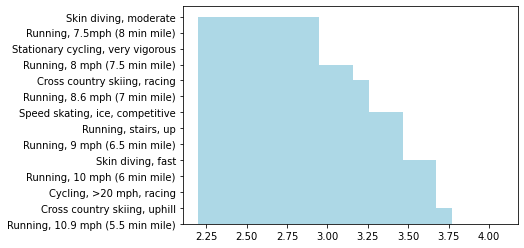

In [250]:
plt.bar(first_df['Calories per kg'], first_df['Activity (1 hr)'], width = 0.75, color = 'lightblue')

<AxesSubplot:xlabel='Calories per kg', ylabel='Density'>

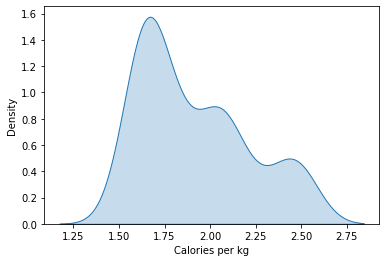

In [406]:
import seaborn as sns
sns.kdeplot(second_df['Calories per kg'], shade=True)

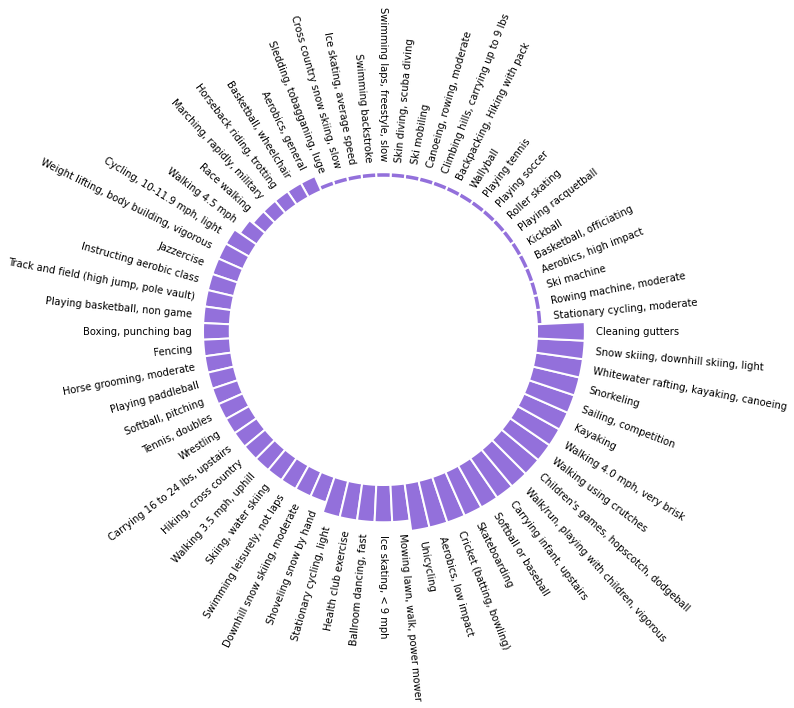

In [236]:
import numpy as np
### Partly taken from StackOverflow
plt.figure(figsize = (10, 7.5))
ax = plt.subplot(111, polar = True)
plt.axis('off')
upperLimit = 50
lowerLimit = 40
max_value = third_df['Calories per kg'].max()
slope = (max_value - lowerLimit) / max_value
heights = slope * third_df['Calories per kg'] + lowerLimit
width = 2 * np.pi / len(third_df.index)
indexes = list(range(1, len(third_df.index)+1))
angles = [element * width for element in indexes]
bars = ax.bar(x = angles, height = heights, width = width, bottom = lowerLimit, linewidth = 2, 
    edgecolor = "white", color = "mediumpurple")
for bar, angle, height, label in zip(bars, angles, heights, third_df["Activity (1 hr)"]):
    rotation = np.rad2deg(angle)
    alignment = ""
    if angle >= np.pi / 2 and angle < 3 * np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    ax.text(x = angle, y = lowerLimit + bar.get_height() + 3, s = label, ha = alignment, 
        va = 'center', rotation = rotation, rotation_mode = "anchor") 

In [238]:
import plotly.graph_objects as go
fig = go.Figure(go.Bar(x = fourth_df['Calories per kg'], y = fourth_df['Activity (1 hr)'], orientation='h'))
fig.show()

In [407]:
bars

<BarContainer object of 68 artists>

In [408]:
x = [1,2,3,4,5,6,7,8,9,12,12,31,3,14,4,2,53,45,34,5,4]
y = [2,3,4,5,6,7,8,9,12,12,31,3,14,4,2,53,45,34,5,4,6]

In [410]:
s = pd.DataFrame({'lon' : x, 'lat' : y})

In [411]:
a = [0,2,3,4,5,6,7,8,9,12,12,31,3,14,4,2,53,45,34,5,4]
b = [22,3,4,5,6,7,8,9,12,12,31,3,14,4,2,53,45,34,5,4,6]

In [412]:
r = pd.DataFrame({'first' : a, 'second' : b})

In [414]:
r.join(s)

,first,second,lon,lat
0,0,22,1,2
1,2,3,2,3
2,3,4,3,4
3,4,5,4,5
4,5,6,5,6
5,6,7,6,7
6,7,8,7,8
7,8,9,8,9
8,9,12,9,12
9,12,12,12,12
